In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [94]:
df = pd.read_csv('data/male_players.csv')

In [95]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           16161 non-null  int64  
 1   Unnamed: 0             16161 non-null  int64  
 2   Rank                   16161 non-null  int64  
 3   Name                   16161 non-null  object 
 4   OVR                    16161 non-null  int64  
 5   PAC                    16161 non-null  int64  
 6   SHO                    16161 non-null  int64  
 7   PAS                    16161 non-null  int64  
 8   DRI                    16161 non-null  int64  
 9   DEF                    16161 non-null  int64  
 10  PHY                    16161 non-null  int64  
 11  Acceleration           16161 non-null  int64  
 12  Sprint Speed           16161 non-null  int64  
 13  Positioning            16161 non-null  int64  
 14  Finishing              16161 non-null  int64  
 15  Sh

In [97]:
# Шаг 1: Категориальные данные
categorical_cols = [
    'Name', 'Position', 'Alternative positions', 'Nation', 
    'League', 'Team', 'play style', 'Preferred foot'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [98]:
# Шаг 2: Числовые данные
# Преобразование целых чисел
int_cols = ['Rank', 'Age', 'Weak foot', 'Skill moves']
for col in int_cols:
    df[col] = df[col].astype('int8')

In [99]:
# Шаг 3: Преобразование Height и Weight
# Извлечение чисел из текста
df['Height'] = df['Height'].str.extract(r'(\d+)')  # Извлекает любые числа
df['Weight'] = df['Weight'].str.extract(r'(\d+)')  # Извлекает любые числа

# Преобразуем к числовому типу
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Проверяем результат
print(df[['Height', 'Weight']].head(10))



   Height  Weight
0     182      75
1     191      82
2     195      94
3     186      75
4     176      73
5     181      75
6     188      86
7     178      68
8     196      90
9     193      91


In [100]:
# Преобразование данных с плавающей точкой
float_cols = [
     'Height', 'Weight','Acceleration', 'Sprint Speed', 'Positioning', 
    'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 
    'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing', 
    'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 
    'Reactions', 'Ball Control', 'Composure', 'Interceptions', 
    'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 
    'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 
    'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 
    'GK Reflexes'
]
for col in float_cols:
    df[col] = df[col].astype('float32')

In [101]:
# Шаг 4: Удаление ненужных колонок
# Если URL не нужен, удаляем его
df = df.drop(columns=['URL'], errors='ignore')

In [103]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0.1           16161 non-null  int64   
 1   Unnamed: 0             16161 non-null  int64   
 2   Rank                   16161 non-null  int8    
 3   Name                   16161 non-null  category
 4   OVR                    16161 non-null  int64   
 5   PAC                    16161 non-null  int64   
 6   SHO                    16161 non-null  int64   
 7   PAS                    16161 non-null  int64   
 8   DRI                    16161 non-null  int64   
 9   DEF                    16161 non-null  int64   
 10  PHY                    16161 non-null  int64   
 11  Acceleration           16161 non-null  float32 
 12  Sprint Speed           16161 non-null  float32 
 13  Positioning            16161 non-null  float32 
 14  Finishing              16161 non-null 

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,16161.0,8080.000000,4665.423186,0.0,4040.0,8080.0,12120.0,16160.0
Unnamed: 0,16161.0,8080.000000,4665.423186,0.0,4040.0,8080.0,12120.0,16160.0
Rank,16161.0,-3.715179,71.619081,-125.0,-61.0,1.0,52.0,127.0
OVR,16161.0,66.172390,6.761979,47.0,62.0,66.0,70.0,91.0
PAC,16161.0,68.149558,10.612153,29.0,62.0,69.0,75.0,97.0
SHO,16161.0,54.146835,13.740389,20.0,45.0,57.0,64.0,93.0
PAS,16161.0,58.434874,9.660646,25.0,52.0,59.0,65.0,94.0
DRI,16161.0,63.599158,9.262399,29.0,58.0,64.0,70.0,92.0
DEF,16161.0,50.591981,16.323879,15.0,36.0,55.0,64.0,89.0
PHY,16161.0,65.241755,9.509657,32.0,59.0,66.0,72.0,91.0


In [105]:
df.isna().sum()

Unnamed: 0.1                 0
Unnamed: 0                   0
Rank                         0
Name                         0
OVR                          0
PAC                          0
SHO                          0
PAS                          0
DRI                          0
DEF                          0
PHY                          0
Acceleration                 0
Sprint Speed                 0
Positioning                  0
Finishing                    0
Shot Power                   0
Long Shots                   0
Volleys                      0
Penalties                    0
Vision                       0
Crossing                     0
Free Kick Accuracy           0
Short Passing                0
Long Passing                 0
Curve                        0
Dribbling                    0
Agility                      0
Balance                      0
Reactions                    0
Ball Control                 0
Composure                    0
Interceptions                0
Heading 

In [106]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [107]:
df.duplicated().sum()

0

In [110]:
def mis_val(data):
    mis_num = data.isnull().sum() 
    mis_num_percent = 100 * data.isnull().sum() /len(data)
    mis_val = pd.concat([mis_num, mis_num_percent], axis = 1)
    mis_val_ren_columns = mis_val.rename(
    columns = {0 : 'Missing values', 1 : '% of Total'})
    mis_val_ren_columns = mis_val_ren_columns[
        mis_val_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total', ascending = False).round(1)
    return mis_val_ren_columns


In [111]:
missing_df = mis_val(df)
missing_df.head(10)

,Missing values,% of Total
GK Diving,14345,88.8
GK Handling,14345,88.8
GK Kicking,14345,88.8
GK Positioning,14345,88.8
GK Reflexes,14345,88.8
play style,8682,53.7
Alternative positions,7247,44.8


In [112]:
df.isna().sum()

Unnamed: 0.1                 0
Unnamed: 0                   0
Rank                         0
Name                         0
OVR                          0
PAC                          0
SHO                          0
PAS                          0
DRI                          0
DEF                          0
PHY                          0
Acceleration                 0
Sprint Speed                 0
Positioning                  0
Finishing                    0
Shot Power                   0
Long Shots                   0
Volleys                      0
Penalties                    0
Vision                       0
Crossing                     0
Free Kick Accuracy           0
Short Passing                0
Long Passing                 0
Curve                        0
Dribbling                    0
Agility                      0
Balance                      0
Reactions                    0
Ball Control                 0
Composure                    0
Interceptions                0
Heading 

In [113]:
int_types = ['uint8', 'int8', 'int16']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [114]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0.1           16161 non-null  int64   
 1   Unnamed: 0             16161 non-null  int64   
 2   Rank                   16161 non-null  int8    
 3   Name                   16161 non-null  category
 4   OVR                    16161 non-null  int64   
 5   PAC                    16161 non-null  int64   
 6   SHO                    16161 non-null  int64   
 7   PAS                    16161 non-null  int64   
 8   DRI                    16161 non-null  int64   
 9   DEF                    16161 non-null  int64   
 10  PHY                    16161 non-null  int64   
 11  Acceleration           16161 non-null  float32 
 12  Sprint Speed           16161 non-null  float32 
 13  Positioning            16161 non-null  float32 
 14  Finishing              16161 non-null 

In [115]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print("Average memory usage for {} columns: {:03.3f} KB".format(dtype, mean_usage_mb))

Average memory usage for float columns: 61.426 KB
Average memory usage for int columns: 113.645 KB
Average memory usage for object columns: 1028.518 KB


In [116]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024
    return "{:03.3f} KB".format(usage_mb)

In [117]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

1136.449 KB
173.733 KB


,before,after
uint8,NaN,7.0
uint16,NaN,2.0
int64,9.0,NaN


In [118]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_int.apply(pd.to_numeric,downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

compare_ints = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

2272.770 KB
568.289 KB


,before,after
float32,36,9


In [119]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float

print(mem_usage(df))
print(mem_usage(optimized_df))

7599.278 KB
7031.118 KB


In [120]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
url,16161,16161,https://www.ea.com/games/ea-sports-fc/ratings/...,1


In [121]:
# Создаем копию датафрейма df для работы
converted_obj = df.copy()

# Обрабатываем все колонки
for col in df.columns:
    num_unique_values = len(df[col].unique())
    num_total_values = len(df[col])
    
    # Проверка на пустую колонку
    if num_total_values > 0 and num_unique_values / num_total_values < 0.5:
        converted_obj[col] = df[col].astype('category')

# Проверяем типы данных
print(converted_obj.dtypes)


Unnamed: 0.1                int64
Unnamed: 0                  int64
Rank                     category
Name                     category
OVR                      category
PAC                      category
SHO                      category
PAS                      category
DRI                      category
DEF                      category
PHY                      category
Acceleration             category
Sprint Speed             category
Positioning              category
Finishing                category
Shot Power               category
Long Shots               category
Volleys                  category
Penalties                category
Vision                   category
Crossing                 category
Free Kick Accuracy       category
Short Passing            category
Long Passing             category
Curve                    category
Dribbling                category
Agility                  category
Balance                  category
Reactions                category
Ball Control  

In [122]:
# Функция для подсчета памяти
def mem_usage(df):
    return df.memory_usage(deep=True).sum() / 1024**2  # Возвращаем в мегабайтах

# Печать использования памяти
print(f"Memory usage before: {mem_usage(df)} MB")
print(f"Memory usage after: {mem_usage(converted_obj)} MB")

# Сравнение типов данных в двух датафреймах
compare_obj = pd.concat([df.dtypes, converted_obj.dtypes], axis=1)
compare_obj.columns = ['before', 'after']

# Для value_counts исключаем несовместимые типы данных, например, категориальные и строковые
def get_value_counts(series):
    try:
        return series.value_counts()
    except TypeError:
        return "Non-comparable types"

# Применяем для сравнения типов
compare_obj_result = compare_obj.apply(lambda x: get_value_counts(x), axis=0)
print(compare_obj_result)


Memory usage before: 7.421170234680176 MB
Memory usage after: 5.080595970153809 MB


TypeError: '<' not supported between instances of 'CategoricalDtype' and 'numpy.dtypes.Float32DType'

In [123]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0.1           16161 non-null  int64   
 1   Unnamed: 0             16161 non-null  int64   
 2   Rank                   16161 non-null  int8    
 3   Name                   16161 non-null  category
 4   OVR                    16161 non-null  int64   
 5   PAC                    16161 non-null  int64   
 6   SHO                    16161 non-null  int64   
 7   PAS                    16161 non-null  int64   
 8   DRI                    16161 non-null  int64   
 9   DEF                    16161 non-null  int64   
 10  PHY                    16161 non-null  int64   
 11  Acceleration           16161 non-null  float32 
 12  Sprint Speed           16161 non-null  float32 
 13  Positioning            16161 non-null  float32 
 14  Finishing              16161 non-null 

In [124]:
print(df.head())
if len(df) >= 10:
    print(df.sample(10))
else:
    print(f"DataFrame has only {len(df)} rows, can't sample 10 rows.")


   Unnamed: 0.1  Unnamed: 0  Rank             Name  OVR  PAC  SHO  PAS  DRI  \
0             0           0     1    Kylian Mbappé   91   97   90   80   92   
1             1           1     2            Rodri   91   66   80   86   84   
2             2           2     4   Erling Haaland   91   88   92   70   81   
3             3           3     5  Jude Bellingham   90   80   87   83   88   
4             4           4     7         Vini Jr.   90   95   84   81   91   

   DEF  ...   Nation            League             Team  \
0   36  ...   France  LALIGA EA SPORTS      Real Madrid   
1   87  ...    Spain    Premier League  Manchester City   
2   45  ...   Norway    Premier League  Manchester City   
3   78  ...  England  LALIGA EA SPORTS      Real Madrid   
4   29  ...   Brazil  LALIGA EA SPORTS      Real Madrid   

                                          play style  \
0  Quick Step+, Acrobatic, Finesse Shot, Flair, R...   
1  Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...   
2 

In [125]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


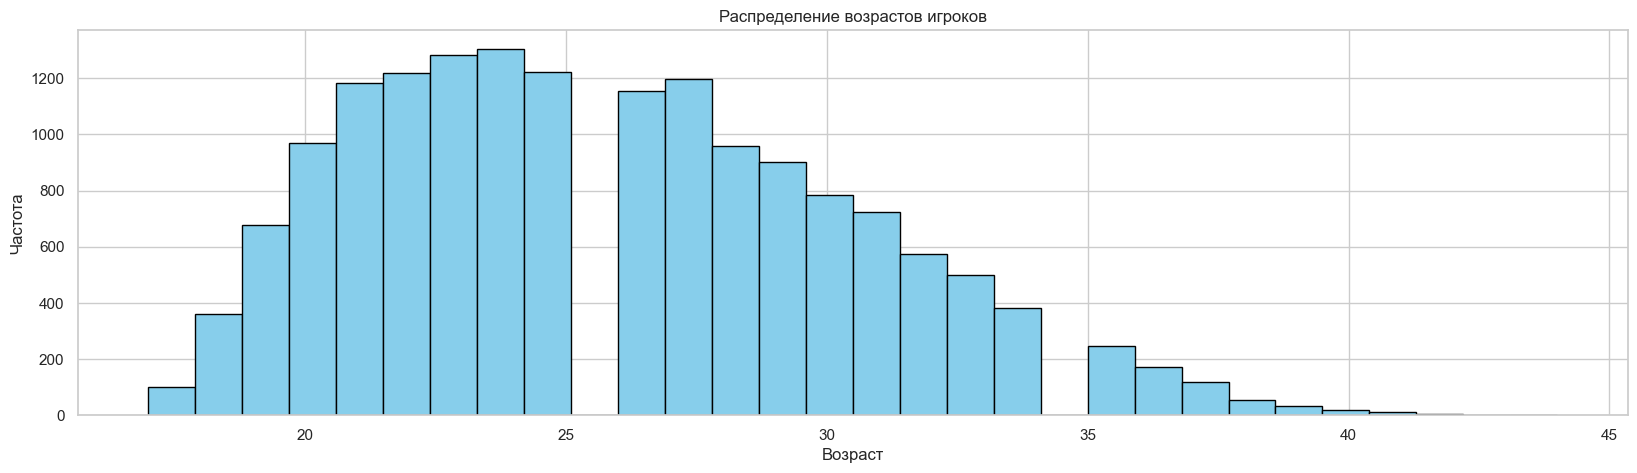

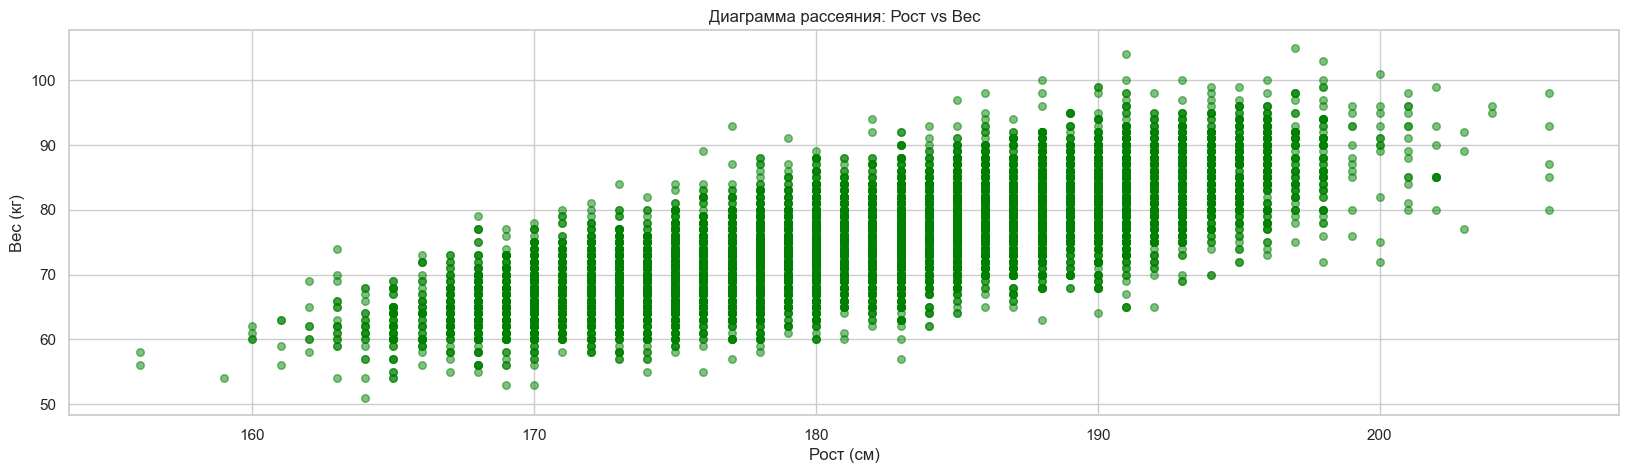

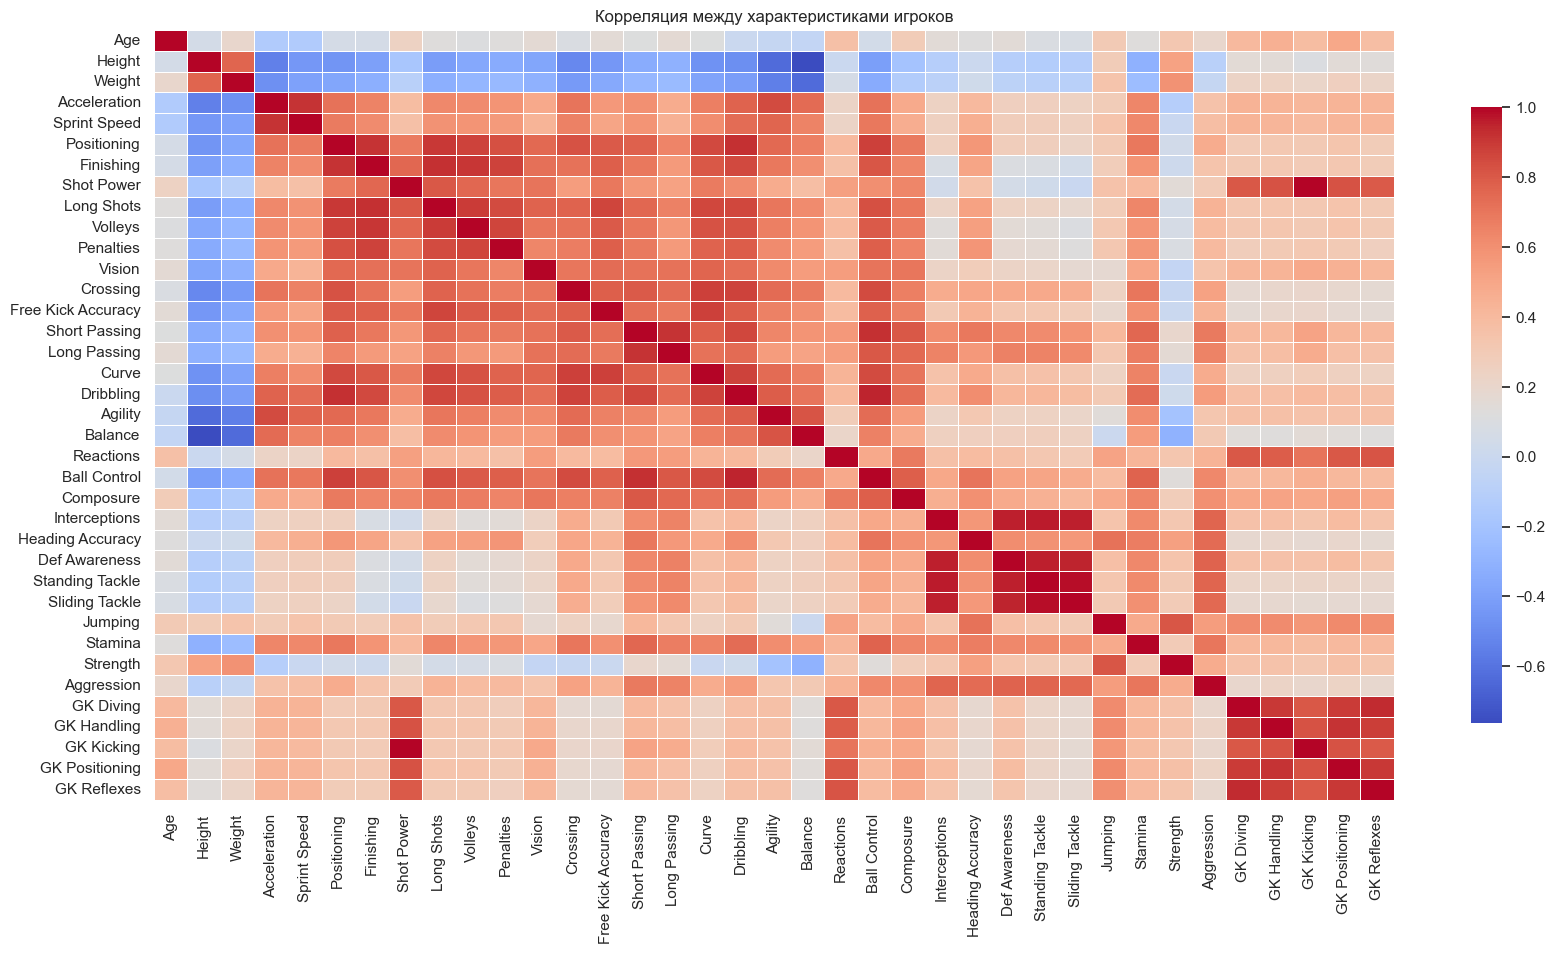

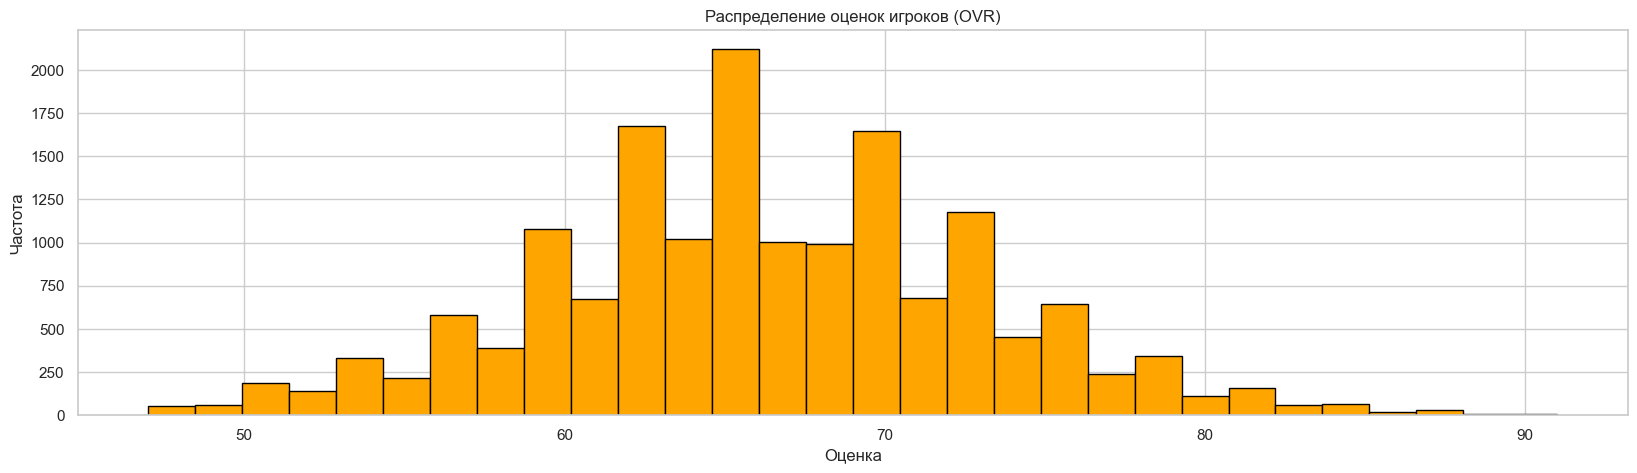

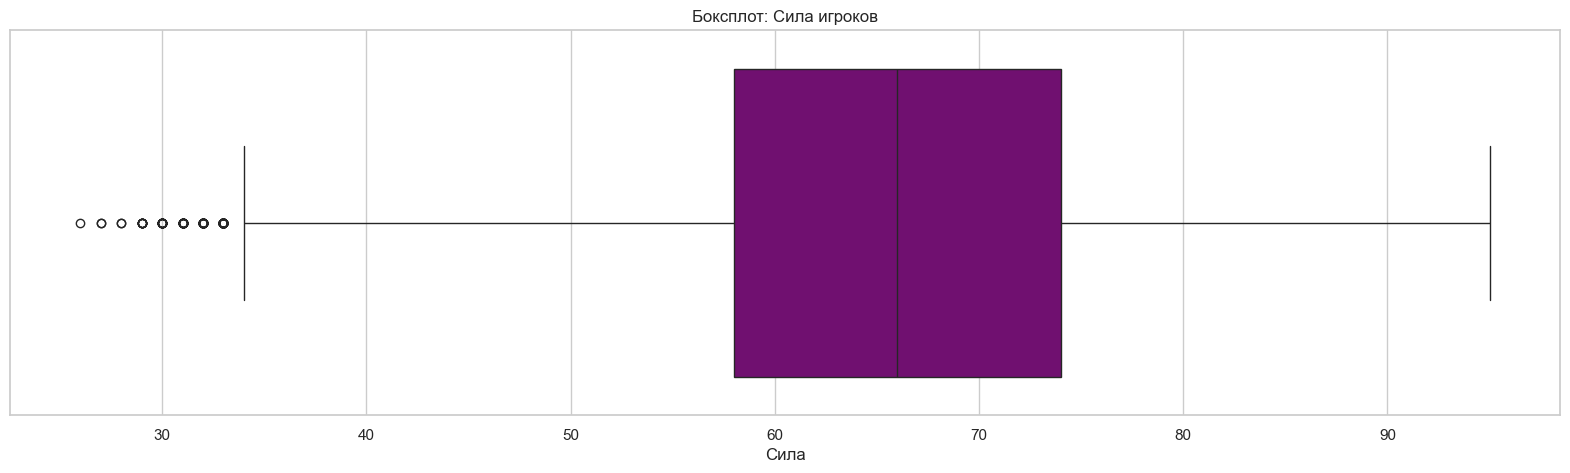

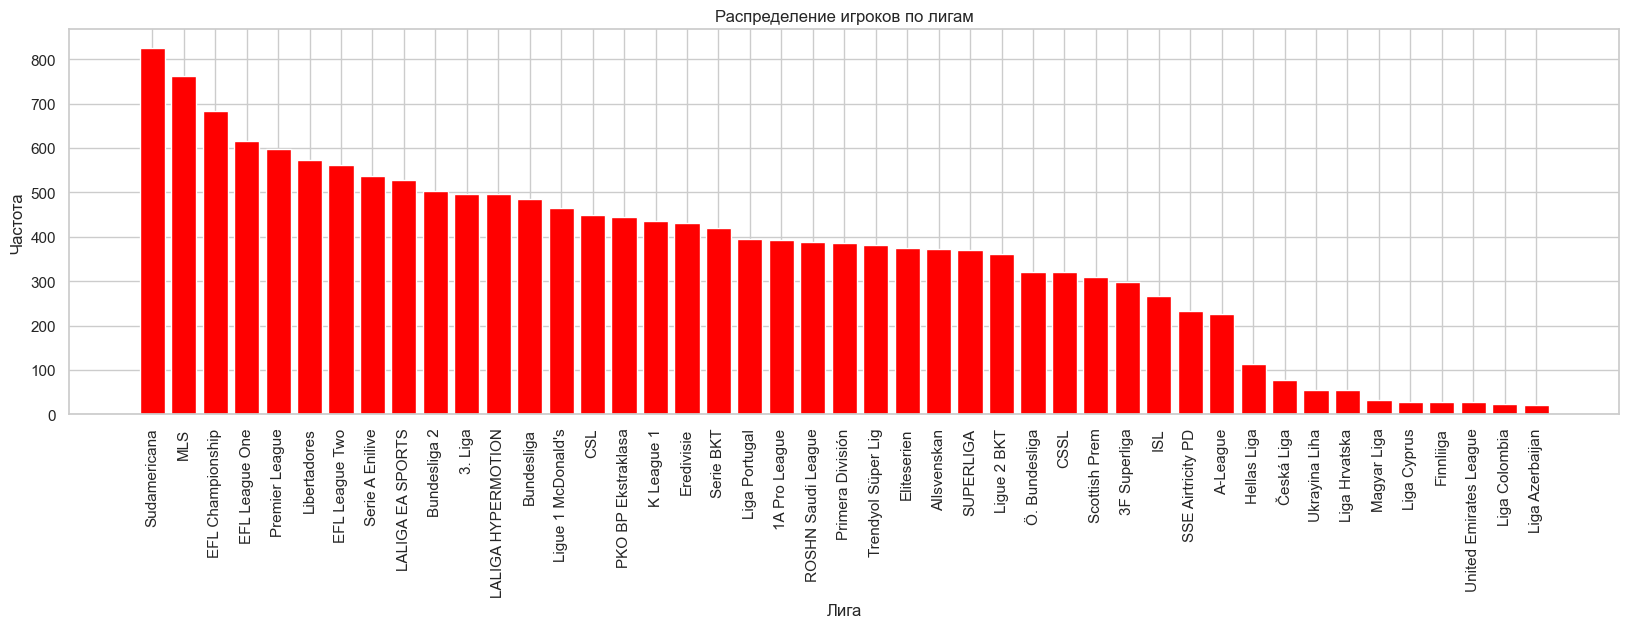

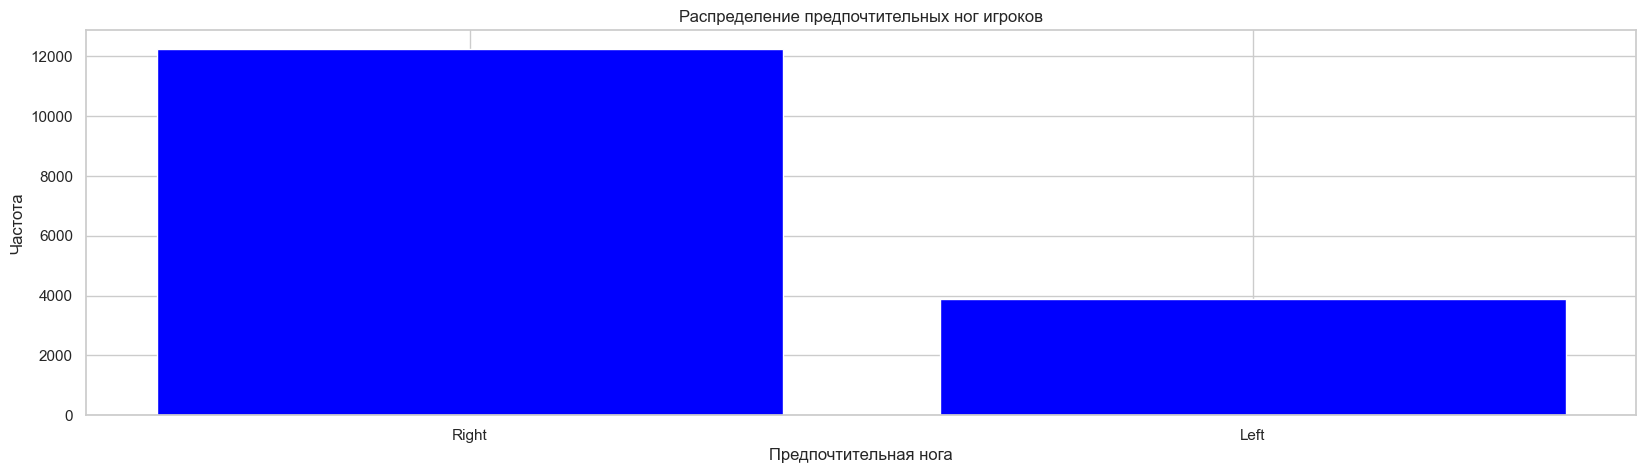

In [133]:


# Устанавливаем стиль для графиков
sns.set(style="whitegrid")

# Создаем список графиков
figures = []

# 1. Гистограмма распределения возрастов
fig, ax = plt.subplots(figsize=(20, 5))
ax.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
ax.set_title('Распределение возрастов игроков')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
figures.append(fig)

# 2. Диаграмма рассеяния для роста и веса
fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(df['Height'], df['Weight'], alpha=0.5, color='green', s=30)
ax.set_title('Диаграмма рассеяния: Рост vs Вес')
ax.set_xlabel('Рост (см)')
ax.set_ylabel('Вес (кг)')
figures.append(fig)

# 3. Тепловая карта корреляции для выбранных числовых параметров
numerical_cols = [
    'Age', 'Height', 'Weight', 'Acceleration', 'Sprint Speed', 
    'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 
    'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy', 
    'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 
    'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions', 
    'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 
    'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
    'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'
]

df_numerical = df[numerical_cols]
corr = df_numerical.corr()

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.2f', linewidths=0.5, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Корреляция между характеристиками игроков')
figures.append(fig)

# 4. Гистограмма распределения оценки игроков (OVR)
fig, ax = plt.subplots(figsize=(20, 5))
ax.hist(df['OVR'], bins=30, color='orange', edgecolor='black')
ax.set_title('Распределение оценок игроков (OVR)')
ax.set_xlabel('Оценка')
ax.set_ylabel('Частота')
figures.append(fig)

# 5. Боксплот для силы (Strength)
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x=df['Strength'], ax=ax, color='purple')
ax.set_title('Боксплот: Сила игроков')
ax.set_xlabel('Сила')
figures.append(fig)

# 6. Столбчатая диаграмма для распределения игроков по лигам
league_counts = df['League'].value_counts()
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(league_counts.index, league_counts.values, color='red')
ax.set_title('Распределение игроков по лигам')
ax.set_xlabel('Лига')
ax.set_ylabel('Частота')

# Поворачиваем метки оси X
ax.set_xticks(range(len(league_counts.index)))
ax.set_xticklabels(league_counts.index, rotation=90)

# 7. Диаграмма для анализа предпочтительных ног (Preferred foot)
foot_counts = df['Preferred foot'].value_counts()
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(foot_counts.index, foot_counts.values, color='blue')
ax.set_title('Распределение предпочтительных ног игроков')
ax.set_xlabel('Предпочтительная нога')
ax.set_ylabel('Частота')
figures.append(fig)

# Показать все графики
for fig in figures:
    plt.show()
